In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Load the dataset
data = pd.read_csv('calories_consumed.csv')

In [5]:
# Display the first few rows of the dataset
print(data.head())

   Weight gained (grams)  Calories Consumed
0                    108               1500
1                    200               2300
2                    900               3400
3                    200               2200
4                    300               2500


In [6]:
#3 DATA PREPROCESSING
# Check for missing values
print(data.isnull().sum())

Weight gained (grams)    0
Calories Consumed        0
dtype: int64


In [7]:

# Since the dataset is small, we'll assume there are no missing values or outliers to treat.


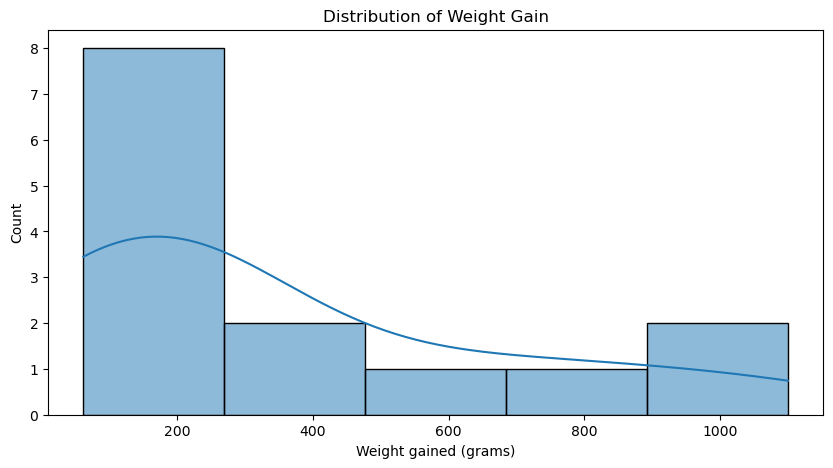

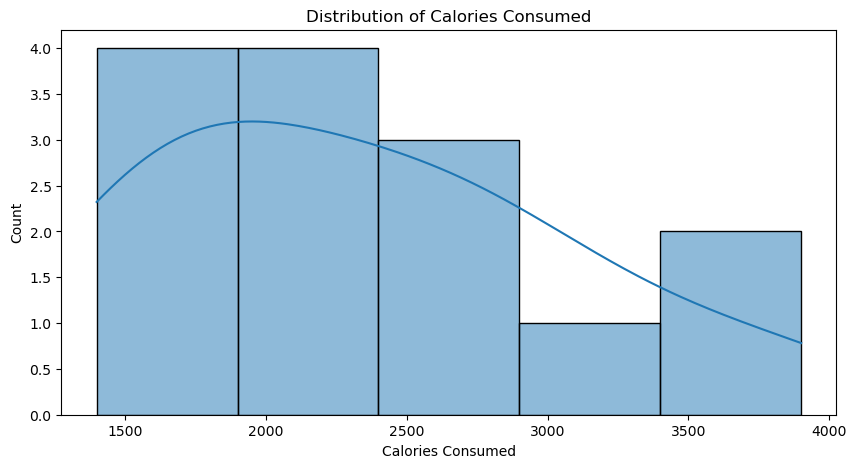

In [8]:
# Exploratory Data Analysis (EDA)
# Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(data['Weight gained (grams)'], kde=True)
plt.title('Distribution of Weight Gain')
plt.show


plt.figure(figsize=(10, 5))
sns.histplot(data['Calories Consumed'], kde=True)
plt.title('Distribution of Calories Consumed')
plt.show()

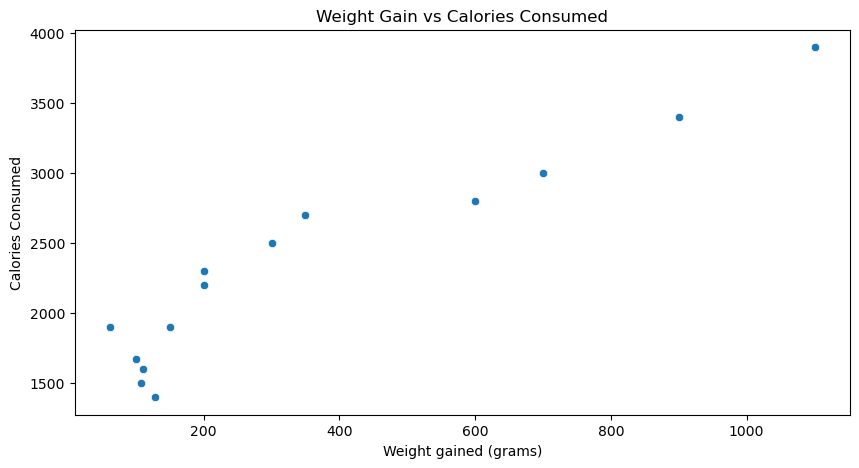

In [9]:
# Bivariate analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Weight gained (grams)', y='Calories Consumed', data=data)
plt.title('Weight Gain vs Calories Consumed')
plt.show()

In [10]:
# Model Building
# Simple Linear Regression model
X = data[['Weight gained (grams)']]
y = data['Calories Consumed']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize the model
model = LinearRegression()

In [13]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')

Simple Linear Regression - RMSE: 204.36123425476396, R-Squared: 0.9621097150609703


In [16]:
'''5.2	Apply different transformations such as exponential, log, polynomial, etc. transformations and calculate RMSE values, R-Squared values, and the c
correlation coefficient for each model.'''
# Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')

Log Transformation - RMSE: 368.3827834041635, R-Squared: 0.8768797504055051


In [17]:
# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')


Polynomial Transformation - RMSE: 399.288972353447, R-Squared: 0.8553543194568906


In [18]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Simple Linear Regression with RMSE: 204.36123425476396 and R-Squared: 0.9621097150609703


In [19]:
#so the best fit model by obesrving the result is Simple Linear Regression

In [20]:
#6.	Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided
#-- # This model helps the company to create personalized diet plans based on the relationship between weight gain and calories consumed, leading to better health outcomes for individuals.